In [2]:
import numpy as numpy
import jax
import jax.numpy as jnp
import importlib
import matplotlib.pyplot as plt
import seaborn as sns

import GGM_sampler
import GGM_inference
import GGM_diagnostics

In [3]:
importlib.reload(GGM_sampler)
importlib.reload(GGM_inference)
importlib.reload(GGM_diagnostics)

<module 'GGM_diagnostics' from '/Users/lucaraffo/Desktop/CFM_2025/codes_final/GGM_diagnostics.py'>

we fix the number of spins to 10, and we generate a sprase precision matrix.

In [4]:
n_spins = 10
precision = GGM_sampler.precision_maker(n_spins, p = 0.2, eps = 0.01, minval = -1.0, maxval = 1.0, seed = 0)

<Axes: >

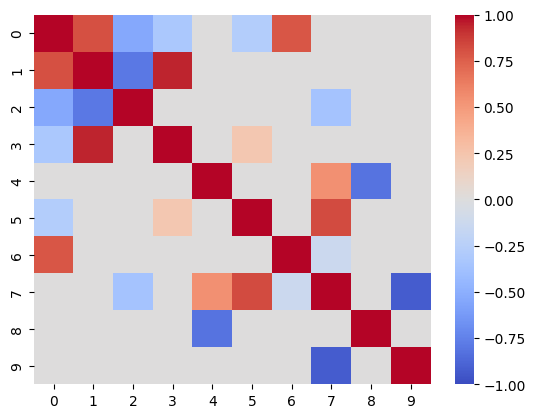

In [5]:
sns.heatmap(precision, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

now we generate some samples from the centered gaussian with this prescribed precision matrix.

In [6]:
n_samples = 100
samples = GGM_sampler.precision_sampler(precision, n_samples, seed = 5)
samples_out = GGM_sampler.precision_sampler(precision, n_samples, seed = 6)

we plot below the results of our inference methods.

MLE

GLASSO

Graphical score matching

CLIME

In [7]:
precision_mle = GGM_inference.naive_mle(samples)

<Axes: >

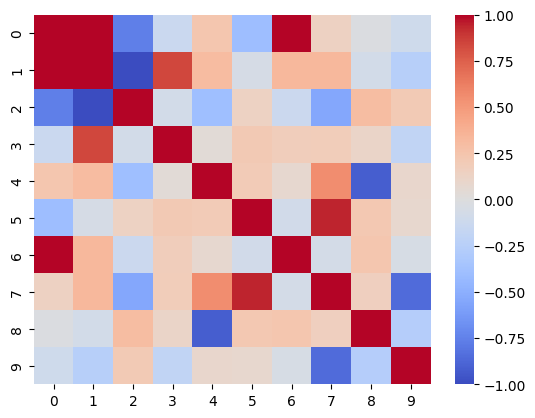

In [8]:
sns.heatmap(precision_mle, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [9]:
precision_glasso = GGM_inference.graphical_lasso(samples, lam = 0.1)

<Axes: >

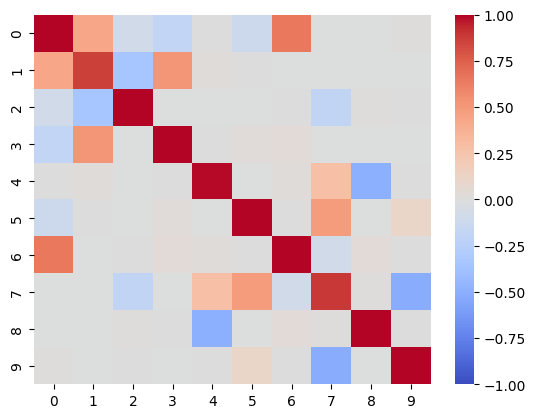

In [10]:
sns.heatmap(precision_glasso, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [11]:
precision_gsm = GGM_inference.graphical_score_matching(samples, lam = 0.1)

<Axes: >

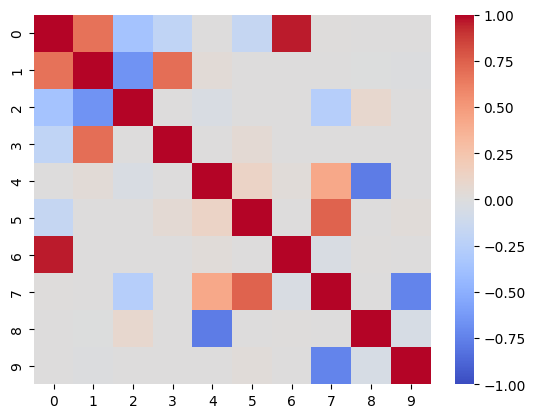

In [12]:
sns.heatmap(precision_gsm, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [13]:
precision_clime = GGM_inference.clime(samples, lam = 0.1)

<Axes: >

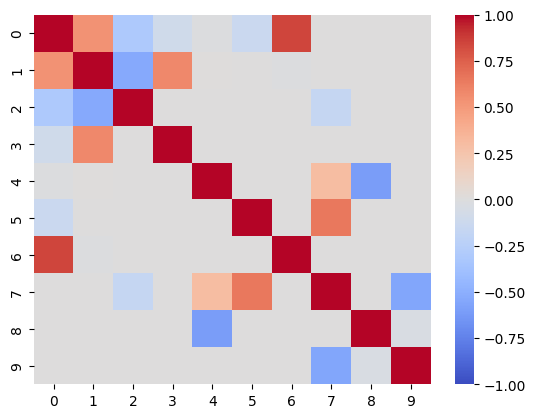

In [14]:
sns.heatmap(precision_clime, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

model fine tuning.

In [17]:
masked_glasso = GGM_diagnostics.mask(precision_glasso, 1e-5)

<Axes: >

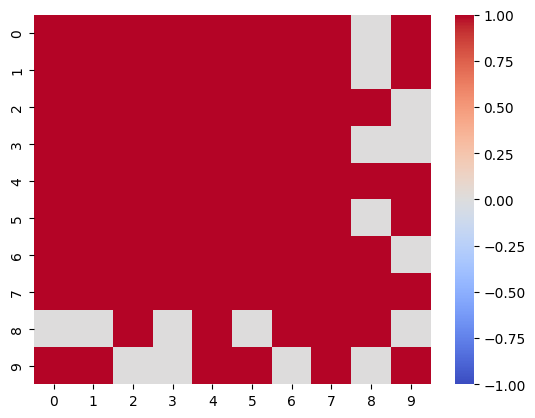

In [18]:
sns.heatmap(masked_glasso, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [19]:
precision_glasso_l0, bic, score = GGM_diagnostics.bic_procedure(samples_out, precision_glasso)

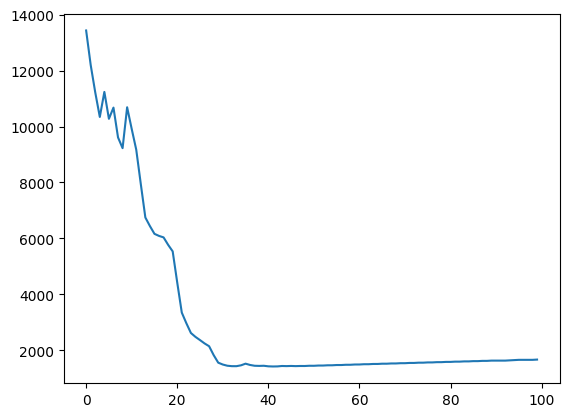

In [20]:
plt.plot(bic)

In [22]:
masked_glasso_l0 = GGM_diagnostics.mask(precision_glasso_l0, 1e-5)

<Axes: >

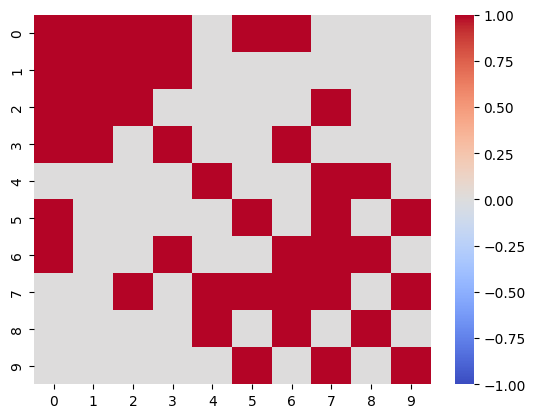

In [23]:
sns.heatmap(masked_glasso_l0, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")

In [24]:
_, precision_glasso_final = GGM_inference.maxdet_cov_completion_early(samples, samples_out, masked_glasso_l0)

/Users/lucaraffo/Desktop/CFM_2025/codes_final/.venv/lib/python3.13/site-packages/cvxpy/problems/problem.py:1539: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


<Axes: >

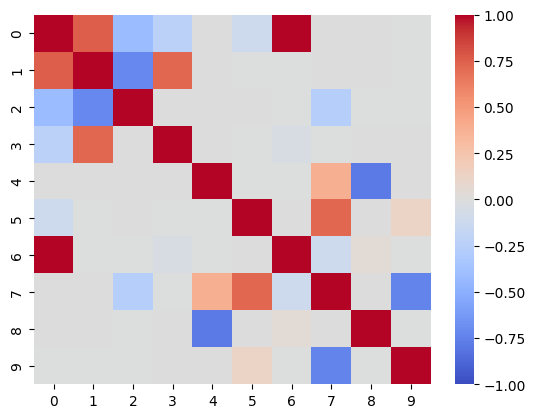

In [25]:
sns.heatmap(precision_glasso_final, vmin = -1.0, vmax = 1.0, cmap = "coolwarm")